An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<b>Strategy:</b>
1. Data understanding</br>
    1.1 Loading dataset and describing them </br>
    1.2 Dropping columns having higher percentage of missing values</br>
    1.3 Data Type correction</br>
2. Data formatting</br>
    2.1 Data formatting</br>
3. Data cleaning</br>
    3.1 Handling missing data</br>
    3.2 Identifying outliers</br>
    3.3 Handling outliers</br> 
    3.4 Checking for data issues </br>
    3.5 Data Imbalance Ratio
4. Data Analysis</br>
    4.1 Univariate Analysis</br>
    4.2 Bivariate Analysis</br>
    4.3 Multivariate Analysis</br>

In [2]:
#Importing libraries
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#train and test split
from sklearn.model_selection import train_test_split

#Standardizing
from sklearn.preprocessing import StandardScaler

#LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Metrics
from sklearn import metrics
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#display settings
pd.set_option('max_columns',None) #pd.set_option('display.max_columns',None)

### 1. Data Understanding

In [3]:
#Reading the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
for i in df.select_dtypes(include='object'):
  print(df[i].value_counts(normalize=True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites     

In [6]:
#columns having select as value instead of null
cols_to_replace = ['Country','Specialization','Get updates on DM Content','Lead Profile','How did you hear about X Education','City']
for i in cols_to_replace:
  df[i] = df[i].replace('Select',np.NaN)

In [7]:
df.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

In [8]:
#Dropping columns that have >40% missing values 
miss_col_df = df.isnull().mean().reset_index()
miss_col_df[0] = miss_col_df[0]*100
miss_col_df = miss_col_df.rename(columns={"index":"Column Name", 0:"Missing Value(%)"})
miss_col_df = miss_col_df.sort_values(by=["Missing Value(%)"],ascending=False)
cols_to_drop = list(miss_col_df[miss_col_df["Missing Value(%)"]>40]["Column Name"])
cols_to_drop

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [9]:
df = df.drop(cols_to_drop, axis=1)
100*df.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [10]:
df[['Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country','City','Page Views Per Visit','TotalVisits','Last Activity','Lead Source']].dtypes

Specialization                                    object
Tags                                              object
What matters most to you in choosing a course     object
What is your current occupation                   object
Country                                           object
City                                              object
Page Views Per Visit                             float64
TotalVisits                                      float64
Last Activity                                     object
Lead Source                                       object
dtype: object

In [11]:
#For categorical columns having greater than 5% missing values, creating separate category
for i in ['Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country','City']:
  df[i] = df[i].replace(np.NaN, 'Other')
100*df.isnull().mean().sort_values(ascending=False)  

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Tags                                             0.000000
Update me on Supply Chain Content                0.000000
Newspaper Article                                0.000000
Get updates on DM Content                        0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
X Education Forums                               0.000000
Search        

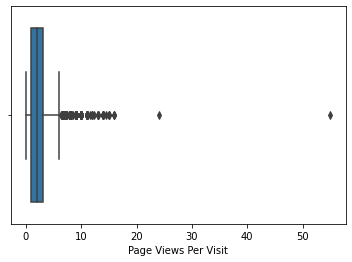

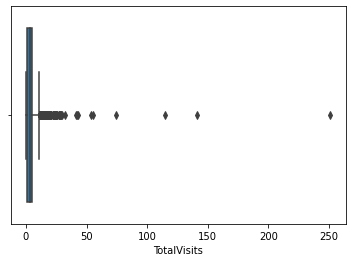

In [12]:
#For numeric variables checking for outliers to choose between mean and median for replacement
for i in ['Page Views Per Visit','TotalVisits']:
  sns.boxplot(df[i])
  plt.show()

In [13]:
#since both have outliers, replacing missing values with median
for i in ['Page Views Per Visit','TotalVisits']:
  df[i] = df[i].replace(np.NaN, df[i].median())
  df[i] = df[i].astype("int64")
100*df.isnull().mean().sort_values(ascending=False)  

Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Magazine                                         0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Tags                                             0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Search                                           0.000000
Lead Number   

In [14]:
#for remaining categorical variable with missing values, replacing with mode
for i in ['Last Activity','Lead Source']:
  df[i] = df[i].replace(np.NaN, df[i].mode()[0])
100*df.isnull().mean().sort_values(ascending=False)  

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

Observation: All Missing values are treated.

In [15]:
#Checking for columns that have bias and are not significant for model building
for i in df.select_dtypes(include="object"):
  print(df[i].value_counts(normalize=True))



7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites     

In [16]:
cols_to_rem = ['Do Not Email','Do Not Call','Update me on Supply Chain Content','Get updates on DM Content','Through Recommendations',
               'Receive More Updates About Our Courses','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Search','Magazine',
               'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Country']
df.drop(cols_to_rem, axis=1, inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,Page Visited on Website,Other,Unemployed,Better Career Prospects,Interested in other courses,Other,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2,Email Opened,Other,Unemployed,Better Career Prospects,Ringing,Other,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1,Converted to Lead,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified


In [17]:
#Checking for spelling mistakes
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('welearnblog_Home','blog')
df['Lead Source'] = df['Lead Source'].replace('WeLearn','blog')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace('youtubechannel','Social Media')
df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
blog                    3
Live Chat               2
Press_Release           2
Pay per Click Ads       1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [19]:
df['Tags'].value_counts()

Other                                                3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
df['Tags'] = df['Tags'].replace('Ringing','Not reachable')
df['Tags'] = df['Tags'].replace('switched off','Not reachable')
df['Tags'] = df['Tags'].replace('Busy','Not reachable')
df['Tags'] = df['Tags'].replace('opp hangup','Not reachable')
df['Tags'] = df['Tags'].replace('invalid number','invalid or missing number')
df['Tags'] = df['Tags'].replace('wrong number given','invalid or missing number')
df['Tags'] = df['Tags'].replace('number not provided','invalid or missing number')
df['Tags'] = df['Tags'].replace('University not recognized','Recognition issue (DEC approval)')
df['Tags'] = df['Tags'].replace('Shall take in the next coming month','Next batch')
df['Tags'] = df['Tags'].replace('Interested in Next batch','Next batch')
df['Tags'] = df['Tags'].replace('Closed by Horizzon','Lost to Competitors')
df['Tags'] = df['Tags'].replace('Lost to Others','Lost to Competitors')
df['Tags'] = df['Tags'].replace('in touch with EINS','Lost to Competitors')
df['Tags'] = df['Tags'].replace('Lost to EINS','Lost to Competitors')
df['Tags'] = df['Tags'].replace('In confusion whether part time or DLP','Reply Awaited')
df['Tags'] = df['Tags'].replace('Still Thinking','Reply Awaited')
df['Tags'] = df['Tags'].replace('Will revert after reading the email','Reply Awaited')
df['Tags'] = df['Tags'].replace('Want to take admission but has financial problems','Interested but financial issues')
df['Tags'].value_counts()

Other                               3353
Reply Awaited                       2083
Not reachable                       1662
Lost to Competitors                  552
Interested in other courses          513
Already a student                    465
invalid or missing number            157
Not doing further education          145
Interested  in full time MBA         117
Graduation in progress               111
Diploma holder (Not Eligible)         63
Next batch                             7
Interested but financial issues        6
Lateral student                        3
Recognition issue (DEC approval)       3
Name: Tags, dtype: int64

In [21]:
df.dtypes

Prospect ID                                      object
Lead Number                                       int64
Lead Origin                                      object
Lead Source                                      object
Converted                                         int64
TotalVisits                                       int64
Total Time Spent on Website                       int64
Page Views Per Visit                              int64
Last Activity                                    object
Specialization                                   object
What is your current occupation                  object
What matters most to you in choosing a course    object
Tags                                             object
City                                             object
Last Notable Activity                            object
dtype: object

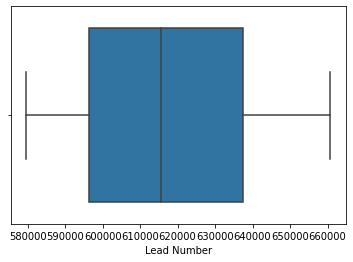

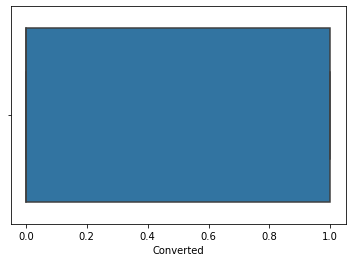

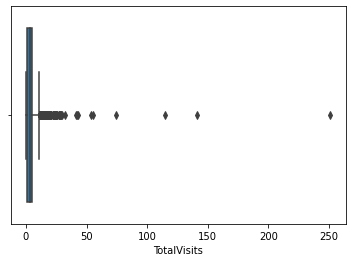

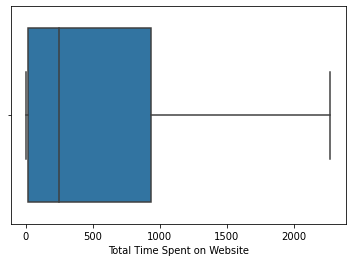

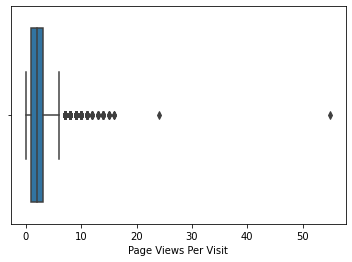

In [22]:
for i in df.select_dtypes(include="int64"):
  sns.boxplot(df[i])
  plt.show()

In [23]:
100*len(df[df['TotalVisits'] > 10])/len(df)
#3% outliers can be replaced

3.8203463203463204

In [24]:
100*len(df[df['Page Views Per Visit'] > 10])/len(df)
#0.5% outliers can be replaced

0.5411255411255411

In [25]:
for i in ['TotalVisits','Page Views Per Visit']:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75)
    IQR = Q3-Q1
    LOWL = Q1-(1.5*IQR)
    UPL = Q3+(1.5*IQR)
    outliers = 0
    outliers = len(df[df[i]<LOWL])
    outliers = outliers + len(df[df[i]>UPL])
    print('Column ',i,'has ', outliers,' outliers before outlier treatment')    
    df[i] = np.where(df[i] > UPL,UPL,np.where(df[i] < LOWL,LOWL,df[i]))
    outliers = len(df[df[i]<LOWL])
    outliers = outliers + len(df[df[i]>UPL])
    print('Column ',i,'has ', outliers,' outliers after outlier treatment')

Column  TotalVisits has  267  outliers before outlier treatment
Column  TotalVisits has  0  outliers after outlier treatment
Column  Page Views Per Visit has  344  outliers before outlier treatment
Column  Page Views Per Visit has  0  outliers after outlier treatment


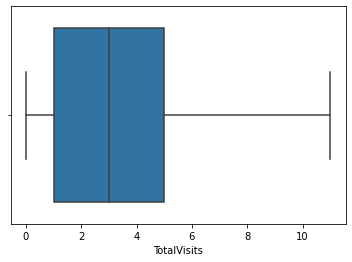

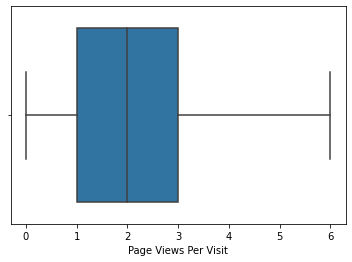

In [26]:
for i in df.select_dtypes(include="float64"):
  sns.boxplot(df[i])
  plt.show()

EDA

In [27]:
### Checking the Conversion Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.53896103896104

In [28]:
df_conv = df[df.Converted==1]
df_nconv = df[df.Converted==0]

In [29]:
#functions to create visualization plots for univariate analysis
def draw_distplot(cols):
    for i in cols:
        plt.figure(figsize=(15,5))
        sns.distplot(df_conv[i], hist=False, color='r',label ="Converted")
        sns.distplot(df_nconv[i], hist=False, color='b', label ="Not Converted")
        plt.title("TARGET V/S "+i, fontdict={'fontsize' : 12, 'fontweight' : 5, 'color' : 'Black'}) 
        plt.legend()
        plt.show()

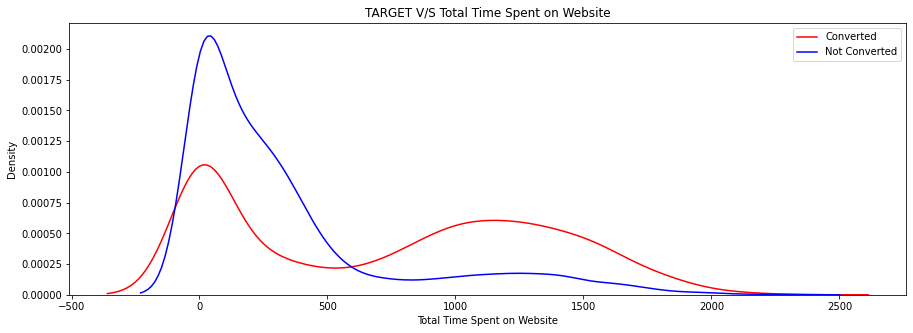

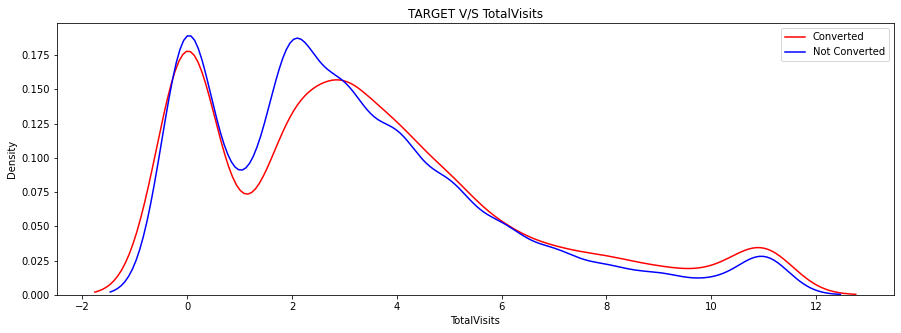

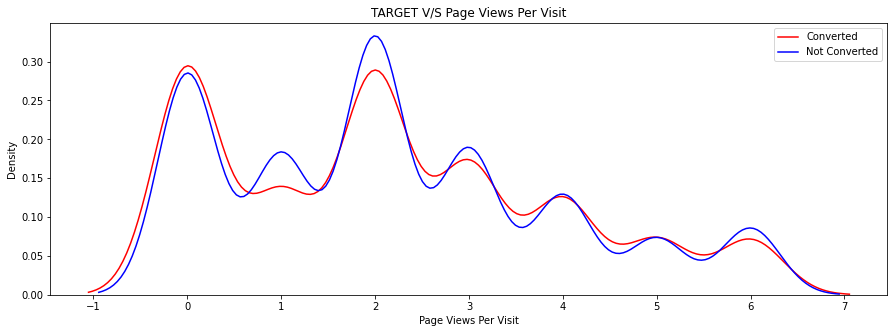

In [30]:
draw_distplot(['Total Time Spent on Website','TotalVisits', 'Page Views Per Visit'])

In [44]:
df.select_dtypes(include='object')

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Other,Unemployed,Better Career Prospects,Interested in other courses,Other,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Other,Unemployed,Better Career Prospects,Not reachable,Other,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Better Career Prospects,Reply Awaited,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Not reachable,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Other,Unemployed,Better Career Prospects,Reply Awaited,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,Reply Awaited,Mumbai,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,invalid or missing number,Mumbai,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Better Career Prospects,invalid or missing number,Mumbai,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,SMS Sent,Human Resource Management,Other,Other,Other,Other Metro Cities,SMS Sent


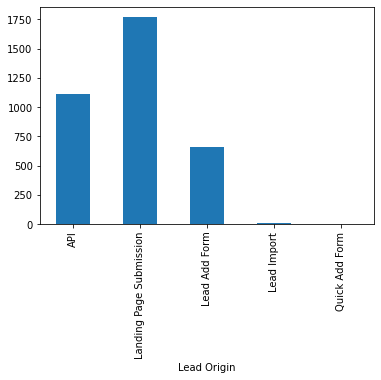

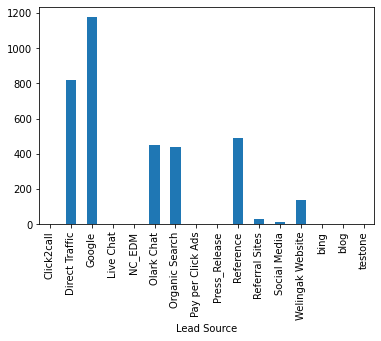

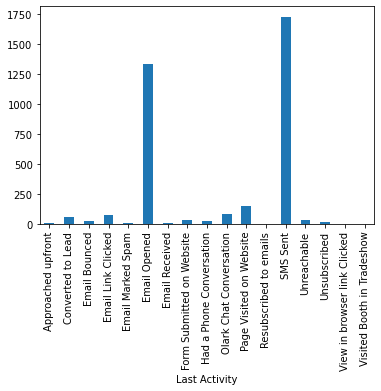

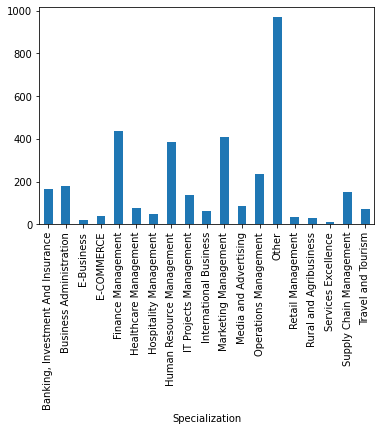

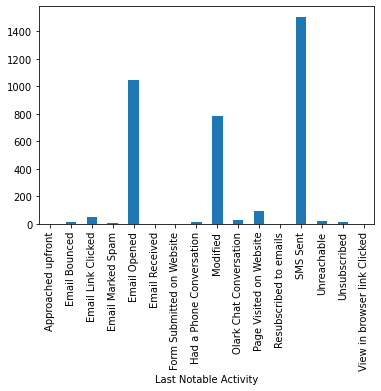

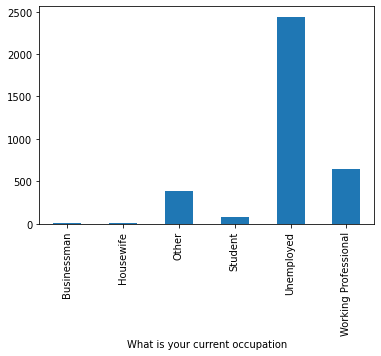

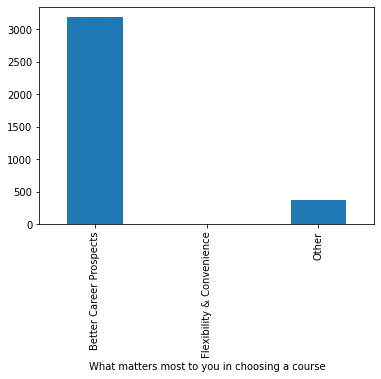

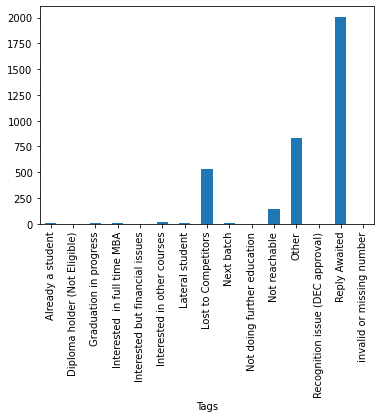

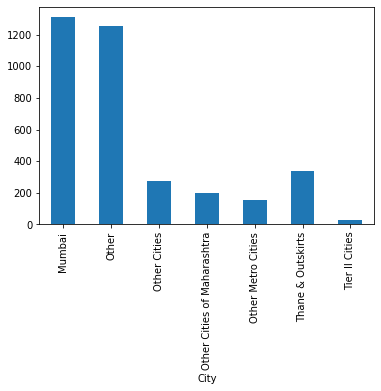

In [45]:
for i in ['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity','What is your current occupation',
          'What matters most to you in choosing a course','Tags','City']:
  df[[i,'Converted']].groupby(i)['Converted'].sum().plot.bar()
  plt.show()

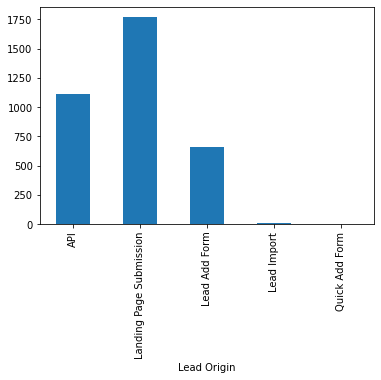

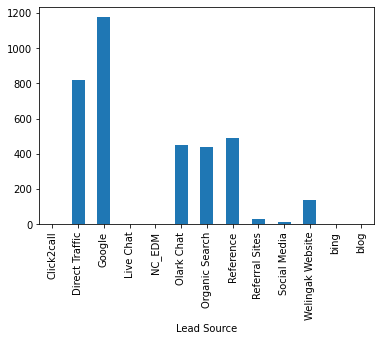

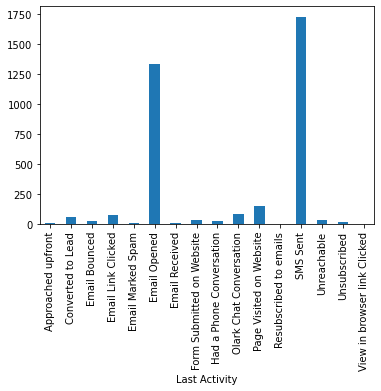

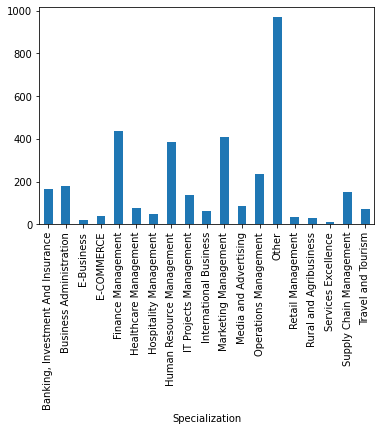

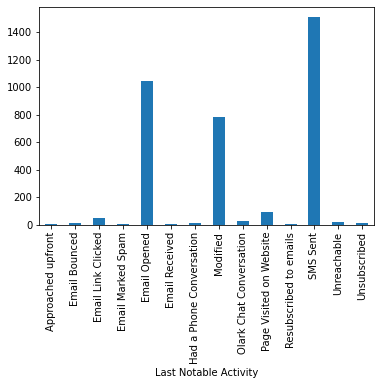

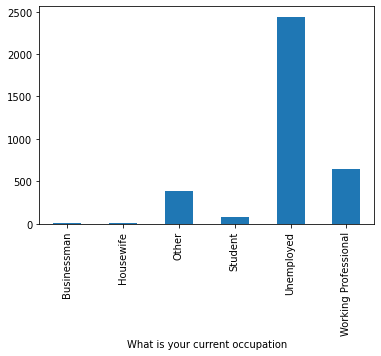

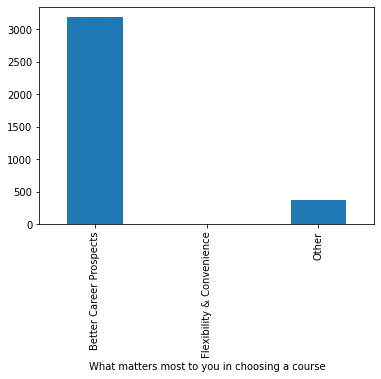

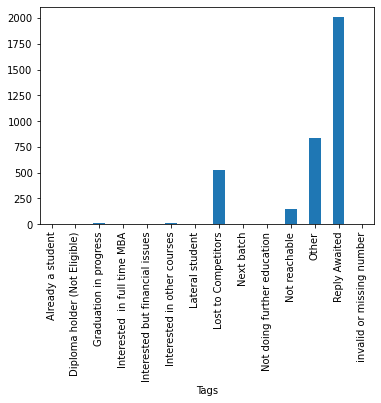

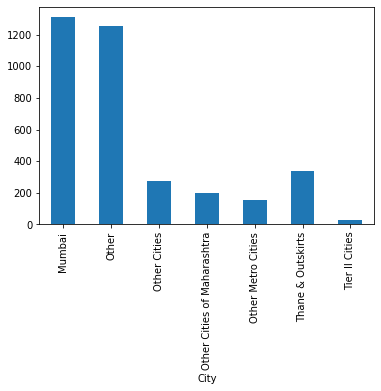

In [46]:
#Now analyzing categorical variables for converted leads
df_conv = df[df.Converted == 1]
for i in ['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity','What is your current occupation',
          'What matters most to you in choosing a course','Tags','City']:
  df_conv[[i,'Converted']].groupby(i)['Converted'].sum().plot.bar()
  plt.show()

In [ ]:
for i in df.select_dtypes(include="object"):
  print(100*df[i].value_counts(normalize=True))

In [ ]:
#Reducing categories
cols_to_combine = []
temp = df['Lead Source'].value_counts().reset_index()
temp = temp[temp["Lead Source"]*100/temp["Lead Source"].sum() < 2]
for i in temp['index']:
    cols_to_combine.append(i)
cols_to_combine

In [ ]:
cols_to_combine1 = []
temp = df['Last Activity'].value_counts().reset_index()
temp = temp[temp["Last Activity"]*100/temp["Last Activity"].sum() < 2]
for i in temp['index']:
    cols_to_combine1.append(i)
cols_to_combine1

In [ ]:
cols_to_combine2 = []
temp = df['Specialization'].value_counts().reset_index()
temp = temp[temp["Specialization"]*100/temp["Specialization"].sum() < 4]
for i in temp['index']:
    cols_to_combine2.append(i)
cols_to_combine2

In [ ]:
cols_to_combine3 = []
temp = df['Tags'].value_counts().reset_index()
temp = temp[temp["Tags"]*100/temp["Tags"].sum() < 2]
for i in temp['index']:
    cols_to_combine3.append(i)
cols_to_combine3

In [ ]:
cols_to_combine4 = []
temp = df['Last Notable Activity'].value_counts().reset_index()
temp = temp[temp["Last Notable Activity"]*100/temp["Last Notable Activity"].sum() < 2]
for i in temp['index']:
    cols_to_combine4.append(i)
cols_to_combine4

In [ ]:
df['Lead Source'] = df['Lead Source'].replace(cols_to_combine, 'Other')
df['Last Activity'] = df['Last Activity'].replace(cols_to_combine1, 'Other')
df['Specialization'] = df['Specialization'].replace(cols_to_combine2, 'Other')
df['Tags'] = df['Tags'].replace(cols_to_combine3, 'Other')
df['Last Notable Activity'] = df['Last Notable Activity'].replace(cols_to_combine4, 'Other')

In [ ]:
# Dropping the first column from the dummies created using 'drop_first = True' to avoid multicollinearity in the model
leadorigin = pd.get_dummies(df['Lead Origin'], drop_first = True, prefix = 'leadorigin')
leadsource = pd.get_dummies(df['Lead Source'], drop_first = True, prefix = 'leadsource')
lastactivity = pd.get_dummies(df['Last Activity'], drop_first = True, prefix = 'lastactivity')
specialization = pd.get_dummies(df['Specialization'], drop_first = True, prefix = 'specialization')
currentocc = pd.get_dummies(df['What is your current occupation'], drop_first = True, prefix = 'currentocc')
reason = pd.get_dummies(df['What matters most to you in choosing a course'], drop_first = True, prefix = 'reason')
tags = pd.get_dummies(df['Tags'], drop_first = True, prefix = 'tags')
city = pd.get_dummies(df['City'], drop_first = True, prefix = 'city')
lastnotableact = pd.get_dummies(df['Last Notable Activity'], drop_first = True, prefix = 'lastnotableact')

In [ ]:
df = pd.concat([df,leadorigin, leadsource, lastactivity, specialization,currentocc, reason, tags, city,lastnotableact ],axis=1)
df.head()

In [ ]:
df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City','Last Notable Activity'],axis=1,inplace=True)
df.head()

In [ ]:
final_df = df.drop(['Prospect ID','Lead Number'],axis=1)
final_df.head()

In [ ]:
final_df.shape

In [ ]:
#checking correlation between numeric and boolean variables with SalesPrice
res = final_df.corr()
f, ax = plt.subplots(figsize=(50,50))
ax = sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()


In [ ]:
#Dropping columns that are highly correlation to remove multicollinearity
final_df.drop(['Page Views Per Visit','leadorigin_Lead Add Form','leadsource_Olark Chat','lastactivity_Email Opened','specialization_Other','city_Other','lastactivity_Email Opened',
               'lastactivity_Email Link Clicked','lastactivity_Page Visited on Website','lastactivity_SMS Sent','currentocc_Other','reason_Other','tags_Other','lastnotableact_Modified',
               'currentocc_Unemployed','tags_Not reachable'],axis=1,inplace=True)

In [ ]:
#checking correlation between numeric and boolean variables with SalesPrice
res = final_df.corr()
f, ax = plt.subplots(figsize=(50,50))
ax = sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()


In [ ]:
# Putting feature variable to X
X = final_df.drop(['Converted'], axis=1)

X.head()

In [ ]:
# Putting response variable to y
y = final_df['Converted']

y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
#selecting features using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

Assessing model with statsmodel

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [ ]:
col = ['Total Time Spent on Website', 'leadorigin_Landing Page Submission',
       'leadorigin_Lead Import', 'leadsource_Organic Search', 'leadsource_Other',
       'lastactivity_Email Bounced', 'lastactivity_Olark Chat Conversation',
       'currentocc_Housewife', 'currentocc_Student',
       'currentocc_Working Professional', 'tags_Interested in other courses',
       'tags_Lost to Competitors', 'tags_Reply Awaited',
       'lastnotableact_SMS Sent']

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [ ]:
col = ['Total Time Spent on Website', 'leadorigin_Landing Page Submission',
       'leadorigin_Lead Import', 'leadsource_Organic Search', 'leadsource_Other',
       'lastactivity_Email Bounced', 'lastactivity_Olark Chat Conversation',
       'currentocc_Student','currentocc_Working Professional', 'tags_Interested in other courses',
       'tags_Lost to Competitors', 'tags_Reply Awaited',
       'lastnotableact_SMS Sent']

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [ ]:
col = ['Total Time Spent on Website', 'leadorigin_Landing Page Submission',
       'leadorigin_Lead Import', 'leadsource_Organic Search', 'leadsource_Other',
       'lastactivity_Email Bounced', 'lastactivity_Olark Chat Conversation',
       'currentocc_Student','tags_Interested in other courses',
       'tags_Lost to Competitors', 'tags_Reply Awaited',
       'lastnotableact_SMS Sent']

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting conversion when lead has not have converted
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))